In [34]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json
import seaborn as sns

%matplotlib inline

In [35]:
def display_images(images):
    plt.figure(figsize=(20, 10))
    for i in range(len(images)):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i])
        plt.axis(False)


In [36]:
def calib_camera(images, charuco_board):
    # establish charuco board
    (squaresX, squaresY, squareLength, markerLength) = charuco_board

    # prepare object points
    objp = np.zeros(((squaresX-1) * (squaresY-1), 3), np.float32)
    objp[:, :2] = np.mgrid[0:(squaresX-1), 0:(squaresY-1)].T.reshape(-1,2)

    # create charuco board
    aruco_dict = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_4X4_1000)
    board = cv2.aruco.CharucoBoard((squaresX, squaresY), squareLength, markerLength, aruco_dict)
    detector = cv2.aruco.CharucoDetector(board)

    # arrays to store object points and image points from all the images.
    objpoints = [] # 3d points in real world space
    imgpoints = [] # 2d points in image plane.
    
    # loop over all image paths
    for i in range(len(images)):
        gray = images[i]
        # apply clahe
        clahe = cv2.createCLAHE(clipLimit=2, tileGridSize=(8, 8))
        clahe_img = clahe.apply(gray)
                
        # find aruco markers
        charuco_corners, charuco_ids, _, _ = detector.detectBoard(clahe_img)
        if charuco_corners is not None:
            if len(charuco_corners) == 0:
                continue
        
        if charuco_corners is not None:
            print(f"Image #{i}: detected {len(charuco_corners)} corner(s) among {objp.shape[0]} corners.")
    
        if charuco_corners is not None and charuco_ids is not None and len(charuco_corners) > 6 and len(charuco_ids) > 6:
            # store object points and image points
            objp_ = objp[charuco_ids]
            objpoints.append(objp_)
            imgpoints.append(charuco_corners)

    # calibrate
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, clahe_img.shape[::-1], None, None, flags=(cv2.CALIB_FIX_ASPECT_RATIO + cv2.CALIB_FIX_FOCAL_LENGTH + cv2.CALIB_SAME_FOCAL_LENGTH))
    return ret, mtx, dist, rvecs, tvecs, objpoints, imgpoints

In [37]:
img_path = '../images/cylinder_telecentric'
cyls = ['cyl4_exposure30000_360frames_flat'] # ,'cyl4_exposure30000_360frames_flat'

In [38]:
charuco_board = (8, 11, 48/11, 18.75*48/11/24)
(squaresX, squaresY, squareLength, markerLength) = charuco_board
print(f'squaresX = {squaresX}')
print(f'squaresY = {squaresY}')
print(f'squareLength = {squareLength} mm')
print(f'markerLength = {markerLength} mm')

squaresX = 8
squaresY = 11
squareLength = 4.363636363636363 mm
markerLength = 3.4090909090909087 mm


In [41]:
for cyl in cyls:
    # import raw images
    raw_images = [cv2.imread(os.path.join(img_path, cyl,'{}.png'.format(i))) for i in range(1, 361)]
    # convert to grayscale
    images = [cv2.cvtColor(raw_image,cv2.COLOR_BGR2GRAY) for raw_image in raw_images]
    print(len(images))

    # calibrate camera
    ret, mtx, dist, rvecs, tvecs, objpoints, imgpoints = calib_camera(images, charuco_board)
    print(mtx)
    print(dist)
    
    

360
Image #16: detected 3 corner(s) among 70 corners.
Image #18: detected 2 corner(s) among 70 corners.
Image #21: detected 1 corner(s) among 70 corners.
Image #22: detected 1 corner(s) among 70 corners.
Image #23: detected 1 corner(s) among 70 corners.
Image #24: detected 2 corner(s) among 70 corners.
Image #26: detected 2 corner(s) among 70 corners.
Image #27: detected 2 corner(s) among 70 corners.
Image #28: detected 2 corner(s) among 70 corners.
Image #29: detected 4 corner(s) among 70 corners.
Image #30: detected 5 corner(s) among 70 corners.
Image #31: detected 3 corner(s) among 70 corners.
Image #32: detected 4 corner(s) among 70 corners.
Image #33: detected 2 corner(s) among 70 corners.
Image #34: detected 3 corner(s) among 70 corners.
Image #35: detected 5 corner(s) among 70 corners.
Image #37: detected 8 corner(s) among 70 corners.
Image #38: detected 12 corner(s) among 70 corners.
Image #39: detected 6 corner(s) among 70 corners.
Image #40: detected 8 corner(s) among 70 corn

In [42]:
ret,mtx, dist

(1.7605566647226762,
 array([[3.96386834e+04, 0.00000000e+00, 1.02350706e+03],
        [0.00000000e+00, 3.96386834e+04, 5.39494132e+02],
        [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]]),
 array([[-5.90020309e-02,  8.86535282e-07,  2.44183996e-03,
          2.42987892e-04,  1.87564981e-10]]))

In [39]:
ret,mtx, dist

(1.7020228666235067,
 array([[9.88842536e+04, 0.00000000e+00, 9.67535600e+02],
        [0.00000000e+00, 4.14526329e+04, 5.39461517e+02],
        [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]]),
 array([[-8.62471008e+00, -2.64552381e+00,  4.33977074e-02,
          4.88734802e-02, -4.62679039e-04]]))

In [68]:
ret,mtx, dist

(0.9625694250218914,
 array([[4.45988874e+04, 0.00000000e+00, 1.03912508e+03],
        [0.00000000e+00, 5.07972303e+04, 5.79393284e+02],
        [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]]),
 array([[-1.21181970e+01, -8.50262951e+02,  1.15658262e-01,
          6.09639654e-02, -8.85325943e-01]]))

In [43]:
len(rvecs), len(tvecs)

(82, 82)

Text(0, 0.5, 'error')

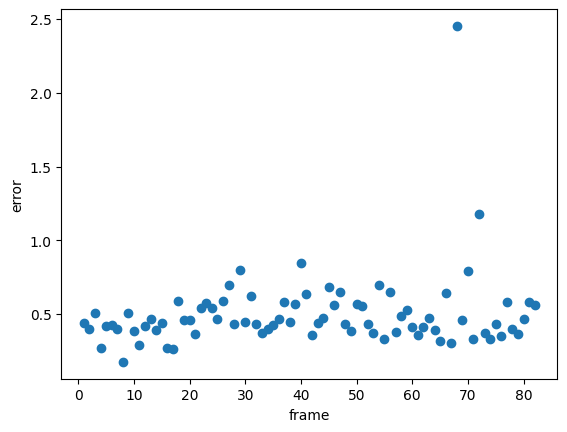

In [44]:
def error_evaluation(objpoints, imgpoints, rvecs, tvecs, mtx, dist):
    error_df = pd.DataFrame({'error':[0]})
    for i in range(len(objpoints)):
        # Project object points to image plane
        reprojectedPoints, _ = cv2.projectPoints(objpoints[i], rvecs[i], tvecs[i], mtx, dist)
        
        img_points = imgpoints
        error = cv2.norm(img_points[i], reprojectedPoints, cv2.NORM_L2) / len(reprojectedPoints)
        new_data = pd.DataFrame({'error':[error]})
        error_df = pd.concat([error_df, new_data], ignore_index=True)
    return error_df
    
error_df = error_evaluation(objpoints, imgpoints,rvecs, tvecs, mtx, dist)[1:]
#error_df
plt.scatter(error_df.index, error_df['error'])
#plt.xlim(0,len(images)+1)
#plt.ylim(0,np.max(error_df['error']))
plt.xlabel('frame')
plt.ylabel('error')

In [45]:
# save camera parameters
intrinsics_path = "../parameters/cyl4_exposure30000_360frames_flat_fix.json"
img_width, img_height = images[0].shape[1], images[0].shape[0]
transforms = {
    "fl_x": mtx[0, 0],
    "fl_y": mtx[1, 1],
    "cx": mtx[0, 2],
    "cy": mtx[1, 2],
    "w": img_width,
    "h": img_height,
    "camera_model": "OPENCV",
    "k1": dist[0, 0],
    "k2": dist[0, 1],
    "p1": dist[0, 2],
    "p2": dist[0, 3],
    "k3": dist[0, 4],
}

with open(intrinsics_path, "w") as f:
    json.dump(transforms, f, indent=4)

# displaying the calibration performance for individual image

In [71]:
# import intrinsic params
intrinsics_path = "../parameters/cyl4_exposure30000_360frames_flat_fix.json"
with open(intrinsics_path, 'r') as json_file:
    intrinsics = json.load(json_file)


In [72]:
# impor mtx and dist
mtx = np.zeros([3,3])
mtx[0,0],mtx[1,1] = intrinsics['fl_x'], intrinsics['fl_y']
mtx[0,2],mtx[1,2] = intrinsics['cx'], intrinsics['cy']
mtx[2,2] = 1

dist = np.array([[intrinsics['k1'], intrinsics['k2'], intrinsics['p1'], intrinsics['p2'], intrinsics['k3']]])


In [73]:
# create charuco board
aruco_dict = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_4X4_1000)
board = cv2.aruco.CharucoBoard((squaresX, squaresY), squareLength, markerLength, aruco_dict)

# arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.


In [74]:
frame = 78
img = images[frame]
gray = img
clahe = cv2.createCLAHE(clipLimit=2, tileGridSize=(8, 8))
clahe_img = clahe.apply(gray)

In [75]:
# find aruco markers
detector = cv2.aruco.CharucoDetector(board)
charuco_corners, charuco_ids, _, _ = detector.detectBoard(clahe_img)

objp = np.zeros(((squaresX-1) * (squaresY-1), 3), np.float32)
objp[:, :2] = np.mgrid[0:(squaresX-1), 0:(squaresY-1)].T.reshape(-1,2)

if charuco_corners is not None:
    print(f"Image #{frame}: detected {len(charuco_corners)} corner(s) among {objp.shape[0]} corners.")

    
if charuco_corners is not None and charuco_ids is not None and len(charuco_corners) > 3 and len(charuco_ids) > 3:
    # store object points and image points
    objp_ = objp[charuco_ids]
    # print(objp_.shape, charuco_corners.shape)
    objpoints.append(objp_)
    imgpoints.append(charuco_corners)



Image #78: detected 12 corner(s) among 70 corners.


In [76]:
for i in range(len(objpoints)):
    # Project object points to image plane
    reprojectedPoints, _ = cv2.projectPoints(objpoints[i], rvecs[i], tvecs[i], mtx, dist)
    

(-0.5, 2047.5, 1079.5, -0.5)

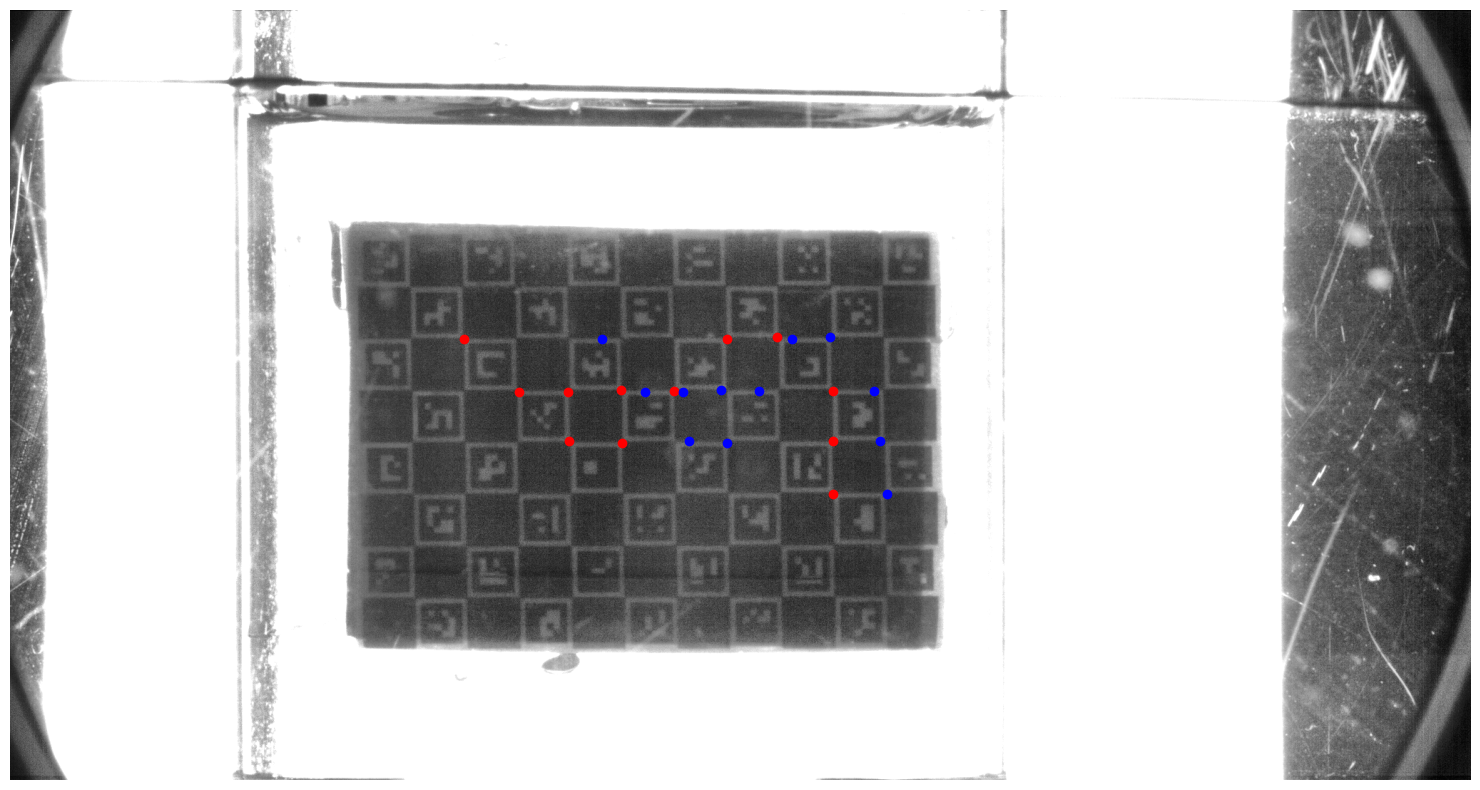

In [78]:
# Add points to the image and draw circles
plt.figure(figsize=(20,10))
plt.imshow(clahe_img, cmap=plt.cm.gray)
plt.scatter(charuco_corners[:, 0, 0], charuco_corners[:, 0, 1], color='r')
plt.scatter(reprojectedPoints[:, 0, 0], charuco_corners[:, 0, 1], color='b')
plt.axis(False)

1080 2048


True

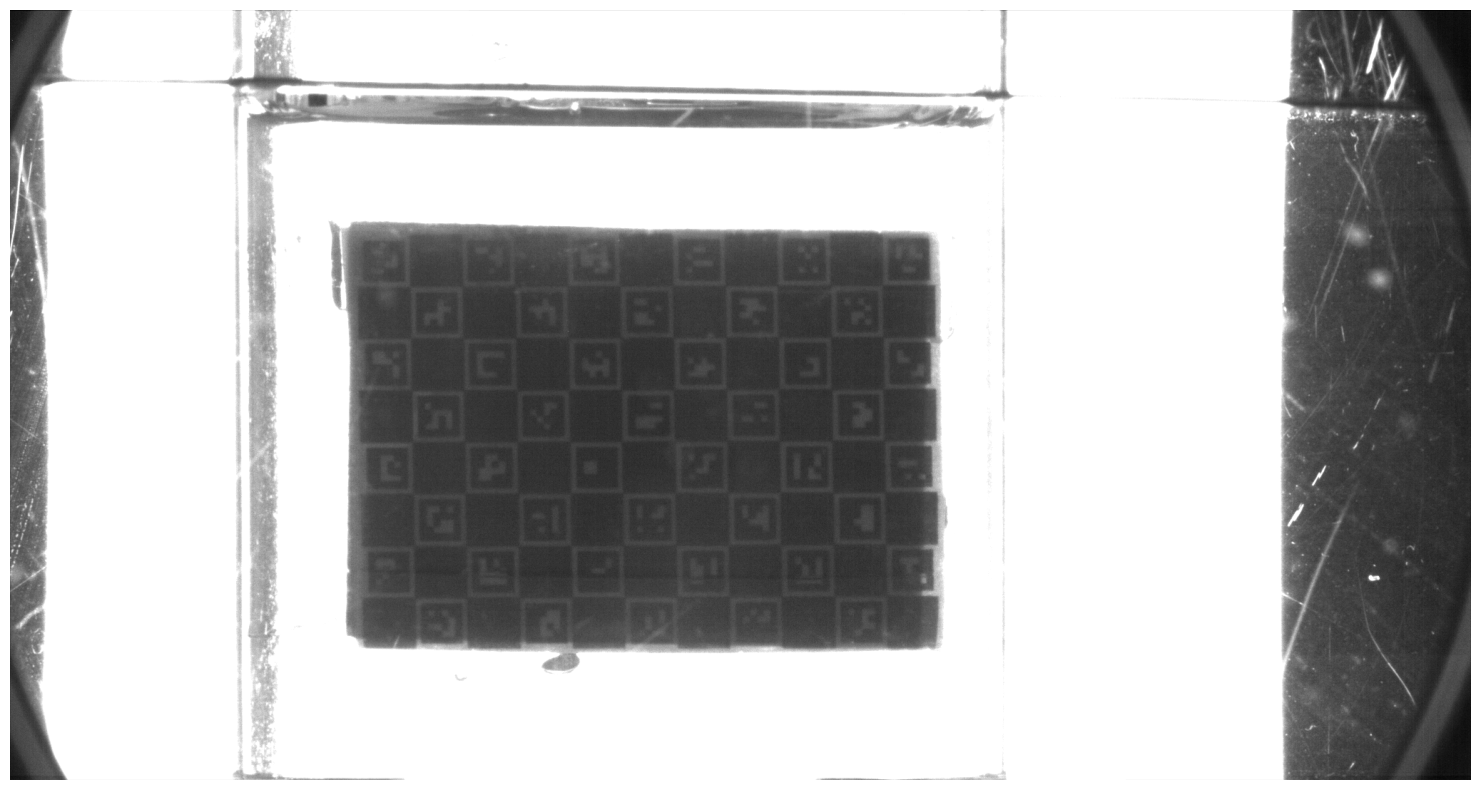

In [51]:
# Undistort an image

h, w = img.shape[:2]
print(h, w)
newcameramtx, roi = cv2.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))

dst = cv2.undistort(img, mtx, dist, None, newCameraMatrix=newcameramtx)
# crop the image
x, y, w, h = roi
#dst = dst[y:y+h, x:x+w]

plt.figure(figsize=(20,10))
plt.imshow(dst,cmap='gray')
plt.axis(False)
cv2.imwrite('calibresult.png', dst)

In [29]:
print(img.shape)
print(dst.shape)
dst.dtype

(1080, 2048)
(1080, 2048)


dtype('uint8')

In [52]:
def viz_diff_reproject_3(ori_img,dst):
    diff = dst.astype(int)-ori_img.astype(int)
    
    plt.figure(figsize=(20,5))

    array = [ori_img,dst,diff]
    cmap = plt.get_cmap('viridis')
    
    for i in range(3):
        plt.subplot(1,3,i+1)   
        plt.imshow(array[i],cmap=cmap)
        plt.colorbar()
    plt.axis(False)

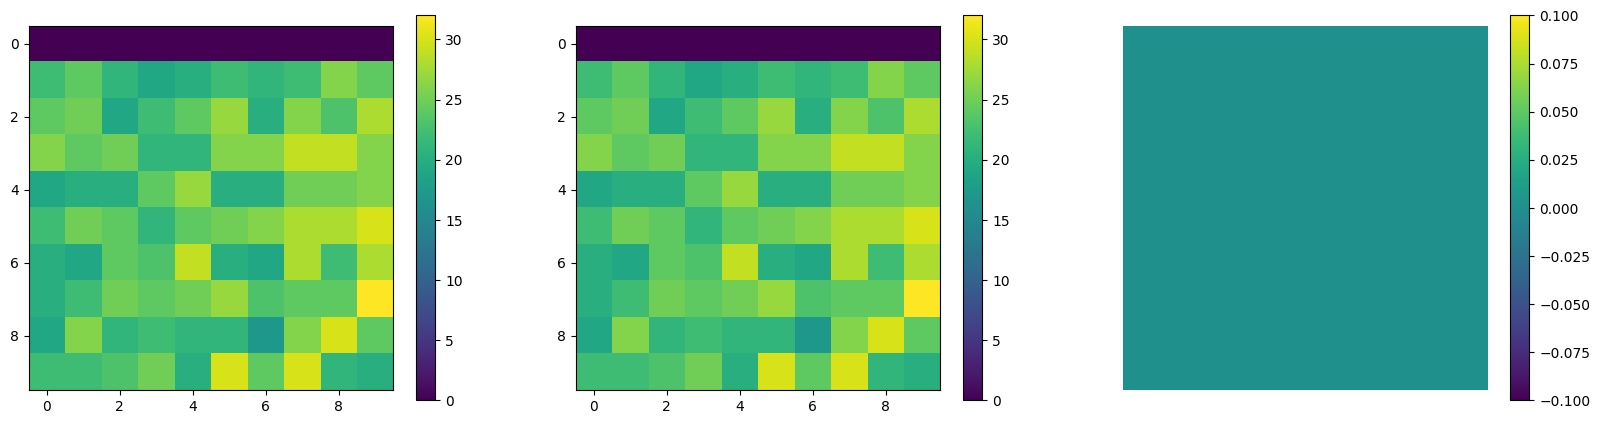

In [53]:
# viz the first 10 rows and columns
viz_diff_reproject_3(img[:10,:10],dst[:10,:10])


In [54]:
def viz_diff_reproject(ori_img,dst):
    diff = dst.astype(int)-ori_img.astype(int)
    
    cmap = plt.get_cmap('viridis')
    plt.figure(figsize=(20,5))
    plt.subplot(1,2,1)   
    plt.imshow(diff,cmap=cmap)
    plt.colorbar()

    plt.subplot(1,2,2)   
    sns.distplot(diff)   

C:\Users\linwang\AppData\Local\Temp\ipykernel_41384\1569237067.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diff)


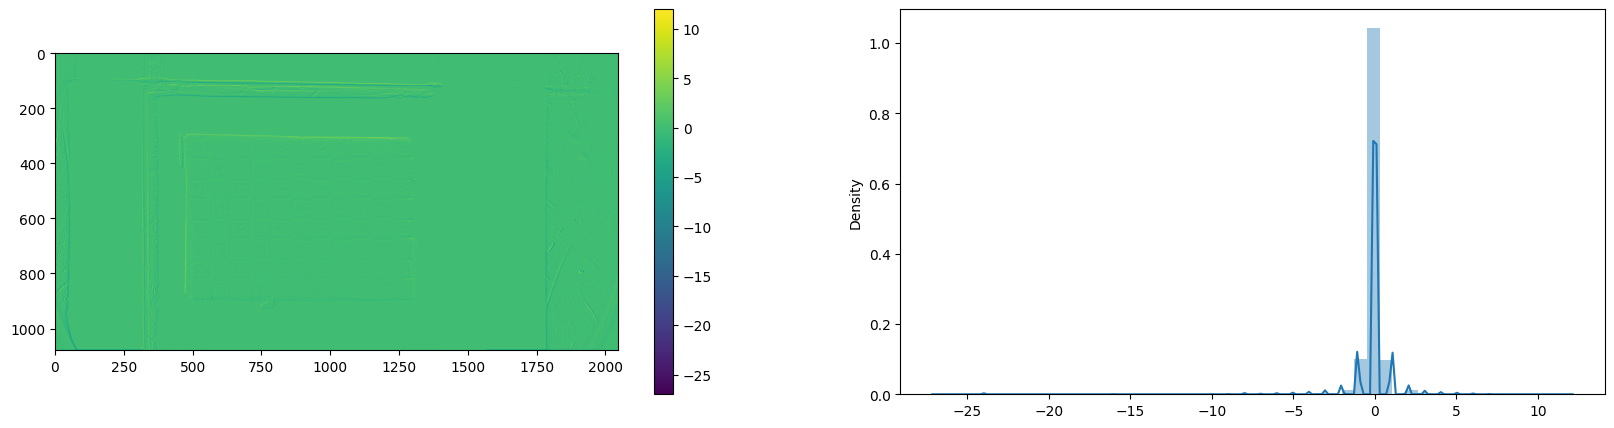

In [55]:
import seaborn as sns
viz_diff_reproject(img,dst)